In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #library to perform visualization in python
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

ms_data=pd.read_csv('Microsoft_Data.csv') #command to read the dataset
ms_data['HasDetections']

#Step1 : Missing Values

#drop Functionality
def dropcolumn(drop_cols):
    ms_data.drop(columns=drop_cols,inplace=True)

# unique and identifier coulmns

def missingValues():
    missing_values_df=pd.DataFrame({'ColumnName':ms_data.columns,
                                'Missingcount':ms_data.isnull().sum(),
                                'MissingvaluePercentage':ms_data.isnull().sum()/ms_data.shape[0]*100
                           })
       
    #print(missing_values_df.sort_values(by='MissingvaluePercentage',ascending=False))
    return missing_values_df

missing_df=missingValues()
dp_col=[]
for row_index,row in missing_df.iterrows():
    if row[2]>30:
        dp_col.append(row[0])
    
dropcolumn(dp_col)
print(dp_col)
missingValues()


['DefaultBrowsersIdentifier', 'OrganizationIdentifier', 'PuaMode', 'SmartScreen', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled']


,ColumnName,Missingcount,MissingvaluePercentage
MachineIdentifier,MachineIdentifier,0,0.000000
ProductName,ProductName,0,0.000000
EngineVersion,EngineVersion,0,0.000000
AppVersion,AppVersion,0,0.000000
AvSigVersion,AvSigVersion,0,0.000000
IsBeta,IsBeta,0,0.000000
RtpStateBitfield,RtpStateBitfield,196,0.345338
IsSxsPassiveMode,IsSxsPassiveMode,0,0.000000
AVProductStatesIdentifier,AVProductStatesIdentifier,222,0.391148
AVProductsInstalled,AVProductsInstalled,222,0.391148


In [67]:
ms_data.dtypes

#drop unique columns
drop_cols_unique=[col for col in ms_data.columns if (ms_data[col].nunique()==1 or 
                                                     ms_data[col].nunique()==ms_data.shape[0])]
print(drop_cols_unique)

dropcolumn(drop_cols_unique)

ms_data.shape



['MachineIdentifier', 'IsBeta', 'AutoSampleOptIn', 'Census_IsFlightsDisabled']


(56756, 70)

In [68]:
#fill missing values

for col in ms_data.columns:
    ms_data[col]=ms_data[col].fillna(ms_data[col].mode()[0])

print(ms_data.isnull().sum())

#convert data tpe to object

numeric_col=[col for col in ms_data.columns if ms_data[col].dtype!='object']
print(len(numeric_col))
for col in numeric_col:
    if(ms_data[col].nunique()==2):
        if((ms_data[col].unique()[0]==0 and ms_data[col].unique()[1]==1) or 
           (ms_data[col].unique()[1]==0 and ms_data[col].unique()[0]==1)):
            ms_data[col]=ms_data[col].astype('category')
    else:
        ms_data[col]=ms_data[col].astype('object')
        

ms_data.dtypes






ProductName                                          0
EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
RtpStateBitfield                                     0
IsSxsPassiveMode                                     0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsVer                                                0
OsBuild                                              0
OsSuite   

ProductName                                            object
EngineVersion                                          object
AppVersion                                             object
AvSigVersion                                           object
RtpStateBitfield                                       object
IsSxsPassiveMode                                     category
AVProductStatesIdentifier                              object
AVProductsInstalled                                    object
AVProductsEnabled                                      object
HasTpm                                               category
CountryIdentifier                                      object
CityIdentifier                                         object
GeoNameIdentifier                                      object
LocaleEnglishNameIdentifier                            object
Platform                                               object
Processor                                              object
OsVer   

In [69]:
#onehotencoding and label encoding
binary_col=[col for col in ms_data.columns if (ms_data[col].nunique()==2 and ms_data[col].dtype=='object') ]
print(binary_col)

for col in binary_col:
    dummies_df=pd.get_dummies(ms_data[col],prefix=col,prefix_sep='_')  
    ms_data=pd.concat([ms_data,dummies_df],axis=1)
    ms_data.drop(columns=col,inplace=True)



print(ms_data.columns)
print(ms_data.shape)

['ProductName', 'Census_DeviceFamily']
Index(['EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches'

In [70]:
ms_data['Processor'].value_counts()


x64      51641
x86       5110
arm64        5
Name: Processor, dtype: int64

In [71]:
#test tran split
from sklearn.model_selection import train_test_split
y=ms_data['HasDetections']

ms_data.drop(columns='HasDetections',inplace=True)
ms_data.shape

X_train, X_test, y_train, y_test = train_test_split(ms_data, y, test_size=0.20, random_state=42)

X_train.shape
X_test.shape

(11352, 71)

In [72]:
from sklearn.preprocessing import LabelEncoder
import bisect

le=LabelEncoder()
train_columns=[col for col in X_train.columns if X_train[col].dtype=='object']


for col in train_columns:
    X_train[col]=le.fit_transform(X_train[col].astype('str'))
    X_test[col] = X_test[col].map(lambda s: 'other' if s not in le.classes_ else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, 'other')
    le.classes_ = le_classes
    X_test[col]=le.transform(X_test[col].astype('str'))



        

print(X_train.columns)
print(X_train['EngineVersion'])
print(X_train.shape)
print(X_test.columns)
print(X_test.shape)







C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying 

Index(['EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplay

In [62]:
X_train['Census_OSBuildRevision'].sort_values(ascending=True)

10860      0
30988      0
33394      0
7911       0
44748      0
15285      0
55676      0
45019      0
21789      0
1871       0
23275      0
25806      0
47543      0
16973      0
48343      0
32359      0
16512      0
48320      0
56307      0
47480      0
11334      0
15076      0
47055      0
15122      0
38445      0
44006      0
1358       0
55109      0
30483      0
17574      0
        ... 
41530    203
44425    203
41363    203
7402     203
38871    203
52008    203
35663    203
30524    203
44795    203
21098    203
52171    203
18571    203
38969    203
14003    203
16078    203
31617    203
37961    203
3778     203
16036    203
37297    203
53113    203
52138    203
3040     203
21949    203
29564    203
38264    203
41191    204
33593    204
2691     204
845      204
Name: Census_OSBuildRevision, Length: 45404, dtype: int64

In [73]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
#Logistic object
logreg = LogisticRegression()

#training the model
logreg.fit(X_train, y_train)

#predicting the outcome for test data
y_pred = logreg.predict(X_test)


#generate confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))


Accuracy: 0.5059020436927414
Precision: 0.0
recall: 0.0
f1_score: 0.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


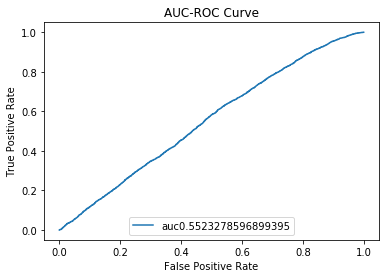

In [65]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
y_pred_proba


fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba) #fucntion retruns false postive rate,true positive rate,
                                                   #threshold value
auc=roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label="auc"+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=8)
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

y_rfp=rf.predict(X_test)

#generate confusion matrix
confusion_matrix=confusion_matrix(y_test,y_rfp)
confusion_matrix

print("Accuracy:", accuracy_score(y_test,y_rfp))
print("Precision:", precision_score(y_test,y_rfp))
print("recall:", recall_score(y_test,y_rfp))
print("f1_score:", f1_score(y_test,y_rfp))

Accuracy: 0.482646229739253
Precision: 0.4097127222982216
recall: 0.10679265466215011
f1_score: 0.16942440956017535
